In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
'''
@File    :   nldg.ipynb
@Time    :   2024/05/20
@Author  :   LI YIMING 
@Version :   1.0
@Site    :   https://github.com/Mingg817
@Desc    :   News-Llama3-DistilBERT-GRU训练notebook
'''

'\n@File    :   nldg.ipynb\n@Time    :   2024/05/20\n@Author  :   LI YIMING \n@Version :   1.0\n@Site    :   https://github.com/Mingg817\n@Desc    :   News-Llama3-DistilBERT-GRU训练notebook\n'

In [3]:
import sys
import os

# 获取项目的根目录路径
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# 将项目根目录添加到sys.path
if project_root not in sys.path:
    sys.path.append(project_root)

In [4]:
from datasets import load_dataset
import os

train_file = []
test_file = []
for file in os.listdir("../dataset"):
    if file.endswith("news.parquet"):
        if "train" in file:
            train_file.append(os.path.join("../dataset", file))
        if "test" in file:
            test_file.append(os.path.join("../dataset", file))


dataset = load_dataset("parquet", data_files={"train": train_file, "test": test_file})
dataset.set_format("torch", columns=["x", "y_hat", "y_avg","x_news","y_news"],output_all_columns=True)

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['start_date', 'ts_code', 'x', 'y_hat', 'y_avg', 'x_news', 'y_news', 'window_size'],
        num_rows: 749
    })
    test: Dataset({
        features: ['start_date', 'ts_code', 'x', 'y_hat', 'y_avg', 'x_news', 'y_news', 'window_size'],
        num_rows: 42
    })
})

In [6]:
from module.NLDG import NLDG
gru = NLDG(31, 32,4).to("cuda")

/home/ubuntu/NCU-Dissertation-2024/.venv/lib/python3.10/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [7]:
Nldg=NLDG(31, 32,4).to("cuda")

train loss 0.003368, test loss 0.003814, avg test loss 0.006169


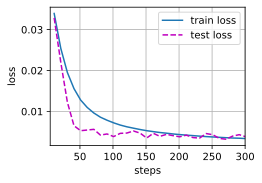

In [8]:
from trainer import NLDG_trainer
from torch import optim, nn
optimizer = optim.AdamW(Nldg.parameters(), lr=0.00005, weight_decay=0.0001)
loss_fn = nn.MSELoss()

NLDG_trainer(
    model=Nldg,
    dataset=dataset,
    num_steps=300,
    batch_size=32,
    optimizer=optimizer,
    loss_fn=loss_fn,
    forcast_length=3,
    test_loss_sample_rate=10,
)

Text(152.16666666666669, 0.5, 'num_layer')

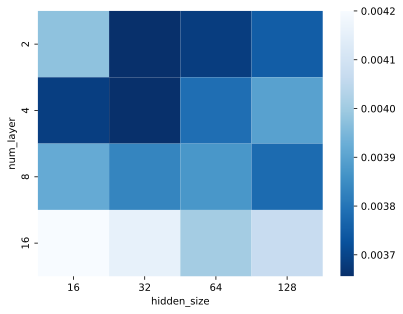

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame(
    [
        [0.003976,0.003658,0.003684,0.003750],
        [0.003687,0.003656,0.003787,0.003898],
        [0.003918,0.003834,0.003872,0.003781],
        [0.004209,0.004156,0.004005,0.004070],
    ],
    index=[ "2", "4", "8","16"],  # DataFrame的行标签设置为大写字母
    columns=["16", "32", "64","128"],
)  # 设置DataFrame的列标签

plt.figure(dpi=300)
sns.heatmap(
    data=df,
    vmin=0.003656,
    vmax=0.0042,
    cmap="Blues_r",  # 矩阵数据集，数据的index和columns分别为heatmap的y轴方向和x轴方向标签
)

plt.xlabel("hidden_size")  # 设置x轴标签
plt.ylabel("num_layer")  # 设置y轴标签

# plt.savefig("heatmap.png")

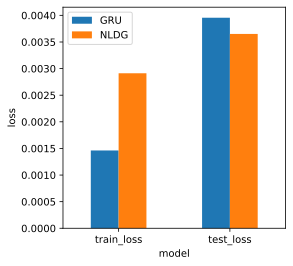

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

train_test_comp_df = pd.DataFrame(
    {"train_loss": [0.001462, 0.002912], "test_loss": [0.003956, 0.003651]},
    index=["GRU", "NLDG"],
)
train_test_comp_df.transpose().plot(kind="bar", rot=0)

# 设置图大小
plt.gcf().set_size_inches(4, 4)
# 设置分辨率
plt.gcf().set_dpi(100)

plt.ylabel("loss")
plt.xlabel("model")